# Project 14 - Finding the Best Markets to Advertise In

In this project we're working for an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

Our dataset is from freeCodeCamp's 2017 survey that can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey). You can read more about the data [here](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb), but in short the data is from the 2017 New Coder Survey, which was an anonymous survey of thousands of people who started coding less than 5 years ago.

We will be using the clean data for this project.

In [1]:
import pandas as pd

#reading in the data
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
# rows and columns
print(data.shape)
#first 5 rows, there are 136 columns, so change max columns
pd.options.display.max_columns = 150
data.head(5)

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

For our goal, we'd like to know:
- Where are these new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

Let's clarify that the data is representative for our population of interest.

In [2]:
#Frequencty table for jobroleinterest
job_role_freq = 100*data['JobRoleInterest'].value_counts(normalize=True)
job_role_freq.head(10)

JobRoleInterest
Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: proportion, dtype: float64

From the frequency table above we can see that the top 3 are interested in being a Full-Stack Web Developer (11.8%), Front-End Web Developer (6.4%) and Data Scientist (2.2%). Overall we can see that there is a lot of interest for being a web developer. Our courses are on mobile and web developing, so let's calculate the percentage of those participants that have "web developer" or "mobile developer" in at least one of their interests.

In [3]:
web_developers = {'Web or mobile developing': 0, 
                  'Other subject': 0
                 }
for role in job_role_freq.index:
    #making sure all are lowercase
    lower_role = role.lower()
    if 'web developer' in lower_role or 'mobile developer' in lower_role:
        web_developers['Web or mobile developing'] += 1
    else:
        web_developers['Other subject'] += 1

print(web_developers)

{'Web or mobile developing': 2920, 'Other subject': 293}


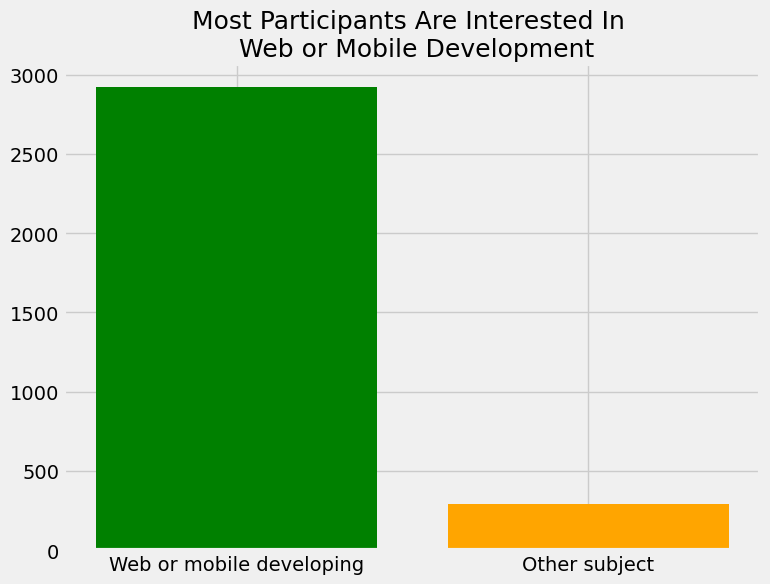

In [4]:
import matplotlib.pyplot as plt
color = ['lightblue', 'orange']

#changing to dataframe for plotting
web_dev_df = pd.DataFrame.from_dict(web_developers, orient='index')

#plotting
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(web_dev_df.index, web_dev_df[0], color=['green', 'orange'])
plt.title('Most Participants Are Interested In \n Web or Mobile Development', fontsize=18)

plt.show()


From the graph above we can clearly see that most participants are interested in web or mobile development. This means that this data is great for our goal.

## New Coders - Locations and Densities

Now that we know that the dataset has the right people in it, we can start with finding out where these new coders are located, and how many coders there are for each location.

In [5]:
import numpy as np

#dropping columns that didn't have answer for role interest
#before
print(data['JobRoleInterest'].isnull())
data.dropna(subset=['JobRoleInterest'], inplace=True)
print(data['JobRoleInterest'].isnull())

0         True
1        False
2        False
3        False
4        False
         ...  
18170     True
18171    False
18172     True
18173     True
18174    False
Name: JobRoleInterest, Length: 18175, dtype: bool
1        False
2        False
3        False
4        False
6        False
         ...  
18161    False
18162    False
18163    False
18171    False
18174    False
Name: JobRoleInterest, Length: 6992, dtype: bool


Above we dropped all the null values from `JobRoleInterest` column, and were left with 6992 rows instead of 18175 rows. Let's now make frequency table for `CountryLive`.

In [6]:
country_freq_table_abs = data['CountryLive'].value_counts()
country_freq_table_abs.head(10)

CountryLive
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: count, dtype: int64

In [7]:
country_freq_table_rel = data['CountryLive'].value_counts(normalize=True)*100
country_freq_table_rel.head(10)

CountryLive
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: proportion, dtype: float64

From the tables above, we can see that top 3 countries are United States of America (45.7%), India (7.7%) and United Kingdom (4.6%). Since we want to choose two markets for advertising, we could choose United States of America and India according to this table, but instead we should continue our analysis to find whether or not people from those countries are willing to spend money on learning.

## Spending Money For Learning

The `MoneyForLearning` column describes the amount of USD that participants have spent from the moment they started coding until the moment they completed the survey.

Our company in this project sells subscriptions at a price of $59 per month, so we want to find out how much money each student spends per month.

We are going to narrow our data for top 4 countries (United States of America, India, United Kingdom and Canada). Besides having the most students in those countries, our courses are in english, and all of these countries have English as an official language.

In [8]:
#choosing our top 4 countries
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
filtered_data = data[data['CountryLive'].isin(countries)].copy()

#money per month = money for learning/monthsprogramming
#replacing 0 months with 1 to avoid dividing with 0
filtered_data['MonthsProgramming'] = filtered_data['MonthsProgramming'].replace(0, 1)
filtered_data['Money_per_month'] = filtered_data['MoneyForLearning'] / filtered_data['MonthsProgramming']

#amount of null values
print(filtered_data['Money_per_month'].isnull().sum())
#dropping null values from Money_per_month and CountryLive
filtered_data.dropna(subset=['Money_per_month'], inplace=True)

#null values after
print(filtered_data['Money_per_month'].isnull().sum())

313
0


In [9]:
#only money per month and country columns needed
filtered_data = filtered_data[['CountryLive', 'Money_per_month']]
#group by countries
grouped_df = filtered_data.groupby('CountryLive').mean().sort_values(by='Money_per_month', ascending=False)
grouped_df

,Money_per_month
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


From the table above we can see that on average participants from the United States of America are ready to spend the most money, followed by India. This is kinda surprising, considering some socio-economical metrics (like GDP PER capita), we would expect people in the UK and Canada to spend more on learning than people in India.

## Dealing with Extreme Outliers

To check that our results are correct, we are going to plot box plots for each country. Because we used mean values for `Money_per_month`, there could be multiple outliers that make our result wrong.

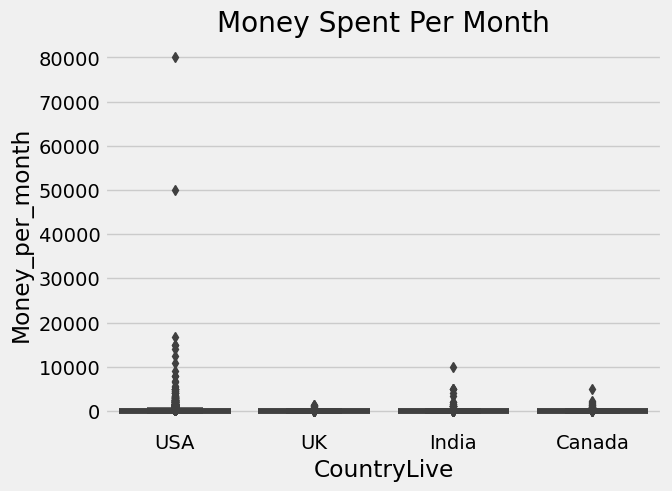

In [10]:
import seaborn as sns

sns.boxplot(x='CountryLive', y='Money_per_month', data=filtered_data)
plt.xticks([0,1,2,3],['USA', 'UK', 'India', 'Canada'])
plt.title('Money Spent Per Month')
plt.show()

Because USA has such a high outliers, it's hard to see outliers in UK, India and Canada. Let's remove some outliers so we can see other countries more clear.

In [11]:
filtered_data = filtered_data[filtered_data['Money_per_month'] < 20000]
#calculate means again
grouped_data_without_extremes = filtered_data.groupby('CountryLive').mean()
print(grouped_data_without_extremes.sort_values(by='Money_per_month', ascending=False))

                          Money_per_month
CountryLive                              
United States of America       183.800110
India                          135.100982
Canada                         113.510961
United Kingdom                  45.534443


From the table above we can see that it stays pretty much the same when removing extreme outliers. However we can see from the box plot above that India has a lot more outliers than UK and Canada, so we can try to create a new boxplot that shows this more clearly.

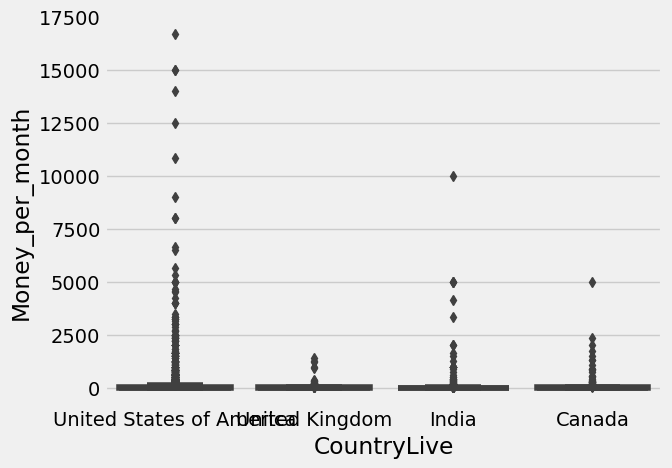

In [12]:
sns.boxplot(x = 'CountryLive', y = 'Money_per_month', data = filtered_data)
plt.show()

We can see that India has 4 outliers above $2500/month, so we could filter those out.

## Indian outliers


Let's take a closer look at India's outliers, why have they spent so much money on their studies?

In [13]:
data['MonthsProgramming'] = data['MonthsProgramming'].replace(0, 1)
data['Money_per_month'] = data['MoneyForLearning'] / data['MonthsProgramming']
indian_outliers = data[(data['CountryLive'] == 'India') & (data['Money_per_month'] > 2500)]
indian_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

None of these outliers have attended bootcamps, which are usually expensive. Overall, it's hard to figure out why they have spent so much money with learning. Perhaps they misunderstood the question, and didn't answer in USD, or included their university tuitions in their answers. (The question was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"). It seems fair to remove these outliers from the data.

In [14]:
filtered_data = filtered_data[filtered_data['Money_per_month'] < 2500]
#calculate means again
grouped_data_final = filtered_data.groupby('CountryLive').mean()
print(grouped_data_final.sort_values(by='Money_per_month', ascending=False))

                          Money_per_month
CountryLive                              
United States of America        97.893738
Canada                          93.065400
India                           65.758763
United Kingdom                  45.534443


Now without the outliers, we can see that Canada would spend more money than India on average. Because of this, we could suggest that the United States of America and Canada are the two markets we should focus on.

We sell subscriptions that cost $59 a month, so India and Canada would both fit well. One option could be to market in 3 markets instead of 2. 

The data suggests that we should not advertise in the UK.

## Deciding between India and Canada

While Canada seems to be willing to pay more per month, India also pays enough. If we take a look at percentages of different countries that answered the survey, we can see the following:

In [15]:
countries_freq_table = filtered_data['CountryLive'].value_counts(normalize=True)*100
countries_freq_table

CountryLive
United States of America    74.727838
India                       11.845516
United Kingdom               7.231726
Canada                       6.194920
Name: proportion, dtype: float64

India has more participants, and higher population overall. This could mean that we get more customers with the same amount of advertising.

At this point, we have multiple options:
1. Advertise in the US, India and Canada, by splitting the amount differently for each country.
   - for example 60% US, 20% India, 20% Canada
   - if we think India has more customers, then 60% the US, 25% India, 15% Canada.
2. Advertise only in two countries
   - 70% for the US, 30% for India or Canada.
3. Advertise only in the US, since it is clearly the best country according to our dataset.

At this point, it's probably the best to let the marketing team decide which approach to take.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two market to advertise in. United States of America was clearly the best market according to our data.

The second best market is not clear, since Canada and India were both very similar. The marketing team should decide what approach to take, from the 3 suggestions we provided.